In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Healthcare Providers.csv')
data.head()


,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


Dropping Unnecessary Columns

In [2]:
# Dropping unnecessary columns
data = data.drop(columns=['Middle Initial of the Provider', 'Street Address 1 of the Provider',  'HCPCS Code'])
data.head()


,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,...,Place of Service,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,M.D.,F,I,FDT 14TH FLOOR,SAINT LOUIS,631041004.0,...,F,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,M.D.,F,I,NaN,FAYETTEVILLE,283043815.0,...,O,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,DPM,M,I,STE 212,NORTH HAVEN,64732343.0,...,O,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,MD,M,I,NaN,KANSAS CITY,641183998.0,...,O,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,DO,M,I,SUITE 200,JUPITER,334585700.0,...,O,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


Encoding Categorical Columns
Categorical columns will be encoded using One-Hot Encoding if they have low cardinality or Frequency Encoding if they have high cardinality.

In [3]:
# Identifying categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
encoded_data = data.copy()

# Applying One-Hot Encoding for low cardinality categorical columns
low_cardinality_cols = [col for col in categorical_columns if data[col].nunique() < 10]
encoded_data = pd.get_dummies(encoded_data, columns=low_cardinality_cols, drop_first=True)

# Applying Frequency Encoding for high cardinality categorical columns
high_cardinality_cols = [col for col in categorical_columns if data[col].nunique() >= 10]
for col in high_cardinality_cols:
    freq_encoding = encoded_data[col].value_counts().to_dict()
    encoded_data[col] = encoded_data[col].map(freq_encoding)

encoded_data.head()




,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Credentials of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,...,Average Medicare Payment Amount,Average Medicare Standardized Amount,Gender of the Provider_M,Entity Type of the Provider_O,Country Code of the Provider_JP,Country Code of the Provider_TR,Country Code of the Provider_US,Medicare Participation Indicator_Y,Place of Service_O,HCPCS Drug Indicator_Y
0,8774979,1891106191,1,1.0,32757.0,2.0,500,631041004.0,1997,11366,...,1,1,False,False,False,False,True,True,False,False
1,3354385,1346202256,251,75.0,32757.0,NaN,209,283043815.0,3725,1028,...,3,1,False,False,False,False,True,True,True,False
2,3001884,1306820956,2,1030.0,1330.0,7.0,10,64732343.0,1403,2027,...,1,1,True,False,False,False,True,True,True,False
3,7594822,1770523540,1,2.0,32874.0,NaN,317,641183998.0,1997,11366,...,320,447,True,False,False,False,True,True,True,False
4,746159,1073627758,1,356.0,2478.0,1624.0,51,334585700.0,7263,11366,...,2,1,True,False,False,False,True,True,True,False


Scaling
We'll use StandardScaler to scale both numerical columns and the transformed categorical columns.

In [4]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(encoded_data), columns=encoded_data.columns)
scaled_data.head()


,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Credentials of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,...,Average Medicare Payment Amount,Average Medicare Standardized Amount,Gender of the Provider_M,Entity Type of the Provider_O,Country Code of the Provider_JP,Country Code of the Provider_TR,Country Code of the Provider_US,Medicare Participation Indicator_Y,Place of Service_O,HCPCS Drug Indicator_Y
0,1.361920,1.366960,-0.383401,-0.660442,0.638605,-0.548038,1.571686,0.696368,-0.737342,1.336743,...,-0.194935,-0.270963,-1.413397,-0.210784,-0.004472,-0.003162,0.007746,0.01761,-1.266985,-0.257051
1,-0.546996,-0.528945,2.854727,-0.549784,0.638605,NaN,0.189180,-0.432558,-0.004973,-0.940500,...,-0.163610,-0.270963,-1.413397,-0.210784,-0.004472,-0.003162,0.007746,0.01761,0.789275,-0.257051
2,-0.671133,-0.665966,-0.370449,0.878292,-1.541230,-0.536514,-0.756245,-1.140775,-0.989093,-0.720441,...,-0.194935,-0.270963,0.707515,-0.210784,-0.004472,-0.003162,0.007746,0.01761,0.789275,-0.257051
3,0.946316,0.947412,-0.383401,-0.658946,0.646720,NaN,0.702275,0.729273,-0.737342,1.336743,...,4.801529,1.590393,0.707515,-0.210784,-0.004472,-0.003162,0.007746,0.01761,0.789275,-0.257051
4,-1.465509,-1.477323,-0.383401,-0.129586,-1.461602,3.190434,-0.561459,-0.265352,1.494517,1.336743,...,-0.179273,-0.270963,0.707515,-0.210784,-0.004472,-0.003162,0.007746,0.01761,0.789275,-0.257051


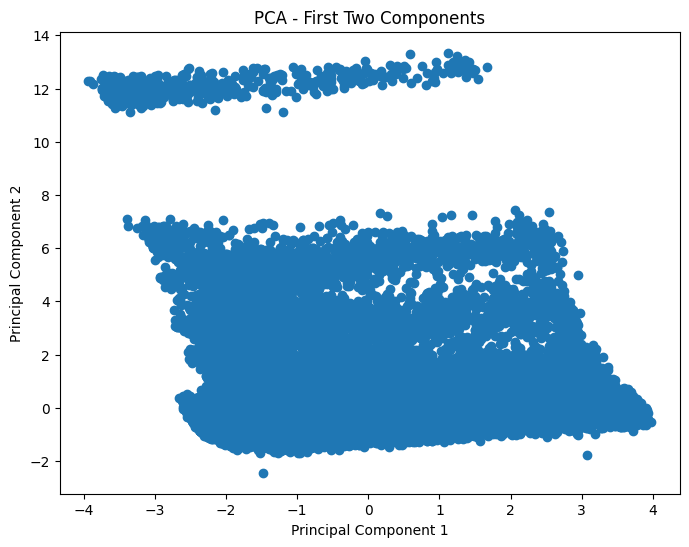

In [6]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming scaled_data is your DataFrame with scaled features

# Impute NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
scaled_data_imputed = imputer.fit_transform(scaled_data)

# Applying PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data_imputed)

# Creating a DataFrame for PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Scatter plot of the first two PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA - First Two Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


PCA

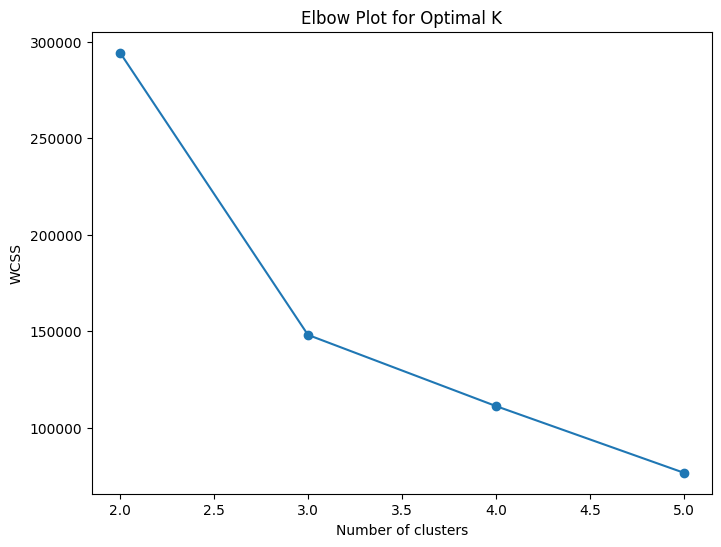

In [7]:
from sklearn.cluster import KMeans

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(2, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(2, 6), wcss, marker='o')
plt.title('Elbow Plot for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Clustering
K-Means Clustering
We'll apply K-Means Clustering on the PCA-transformed data and determine the optimal number of clusters using the elbow method.

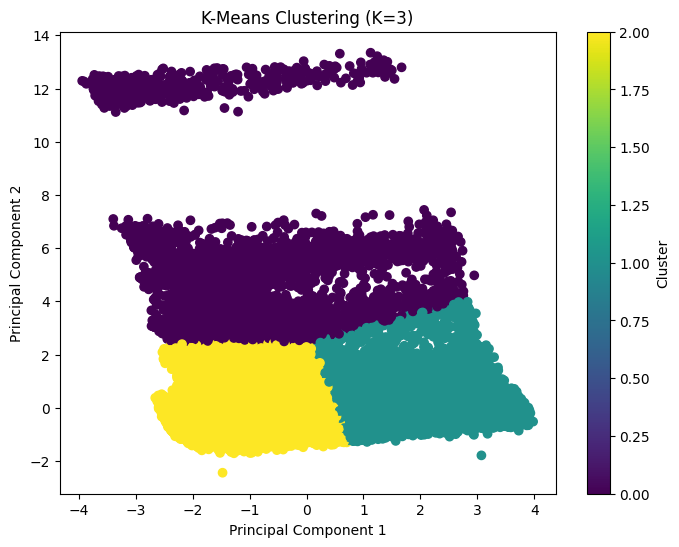

In [8]:
# Applying K-Means with the optimal number of clusters
optimal_k = 3  # Assuming 3 from elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_df)

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


Based on the elbow plot, we'll choose the optimal K value and visualize the clusters.



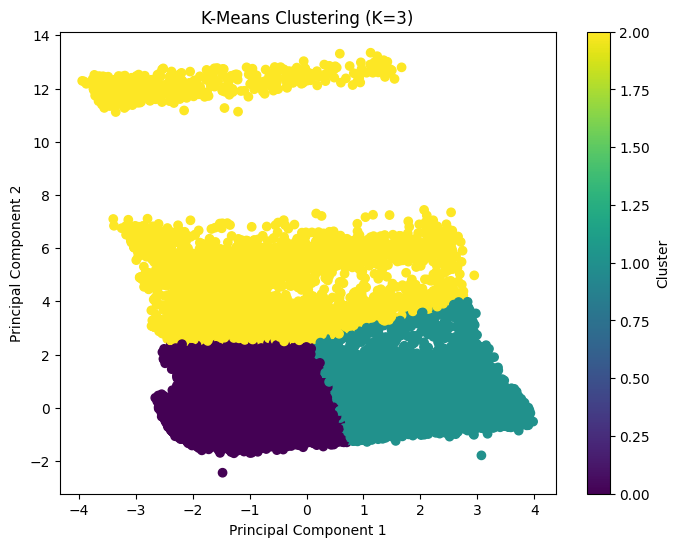

In [9]:
# Applying K-Means with the optimal number of clusters
optimal_k = 3  # Assuming 3 from elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_df)

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


DBSCAN Clustering
We'll apply DBSCAN Clustering and visualize the clusters.

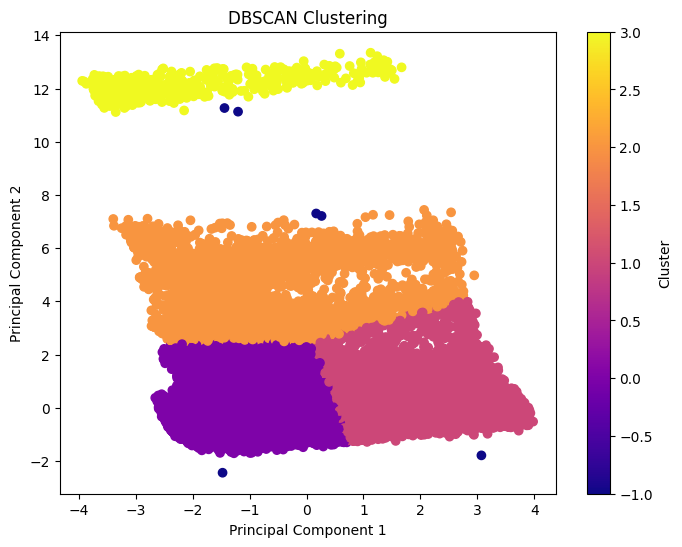

In [10]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
pca_df['DBSCAN_Cluster'] = dbscan.fit_predict(pca_df)

# Scatter plot of DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['DBSCAN_Cluster'], cmap='plasma')
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
